> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a 5000 movie Dataset
studying the movies details and know alot of things like :

Which genres are most popular from year to year? 

the most popular genre ?

What kinds of properties are associated with movies that have high revenues?

does the voting affect the revenue or not ?

best actors ..


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>the importance of studying movies data

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

In [2]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [31]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
def show(dff):
    df.head()
    df.info()
    df.shape
    

#   types and look for instances of missing or possibly errant data.
show(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [32]:
# After discussing the structure of the data and any problems that need to be
df.drop(['homepage', 'tagline', 'production_companies', 'keywords','overview','release_date','cast'], axis = 1, inplace = True)
df.head()
show(df)
#   cleaned, perform those cleaning steps in the second part of this section.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [33]:
#check for null values and deal with it 
df.isnull().sum()


id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [35]:
df.duplicated().sum()

1

In [34]:
#we will remove the null value row because it won't be good do use them since some of the data aren't numerical 
df.dropna(inplace=True)
#check again
show(df)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10796 non-null  int64  
 1   imdb_id         10796 non-null  object 
 2   popularity      10796 non-null  float64
 3   budget          10796 non-null  int64  
 4   revenue         10796 non-null  int64  
 5   original_title  10796 non-null  object 
 6   director        10796 non-null  object 
 7   runtime         10796 non-null  int64  
 8   genres          10796 non-null  object 
 9   vote_count      10796 non-null  int64  
 10  vote_average    10796 non-null  float64
 11  release_year    10796 non-null  int64  
 12  budget_adj      10796 non-null  float64
 13  revenue_adj     10796 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


## Data Cleaning
> at first i checked if there any null or duplicated cells then removed the columns that i won't use ('homepage', 'tagline', 'production_companies', 'keywords','overview','release_date','cast') , then after that i chhecked the null cells again and droped them since filling it with 0 or the mean won't work with the director column or gener since it will give it a wrong value 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

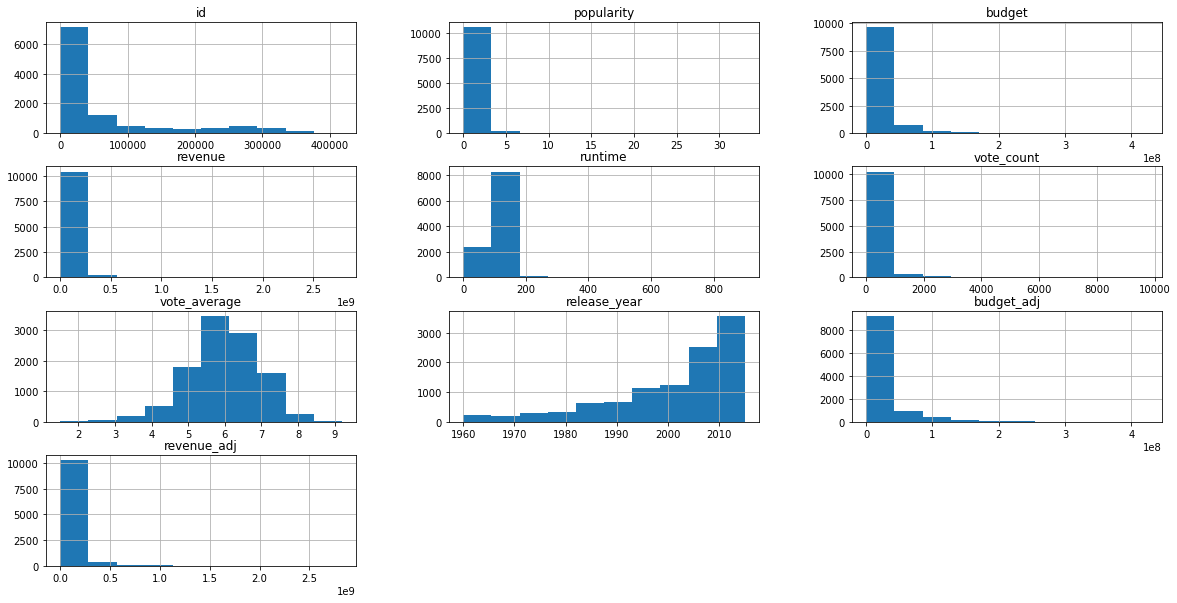

# Exploratory Data histogram
>  the histograms of the data shows that most of the movies are new ones (after 2000) and the average voting of the movie is btween 5 to 7 which means if the movie voting is below 4 (hard cap) then that means the movie isn't that good and the opposite 
the amount of movies that had rating above 9 is not alot which means that 8 to 9 means that the movie is that good



In [ ]:
df.hist(figsize=(20,10))

<AxesSubplot:xlabel='budget', ylabel='revenue'>

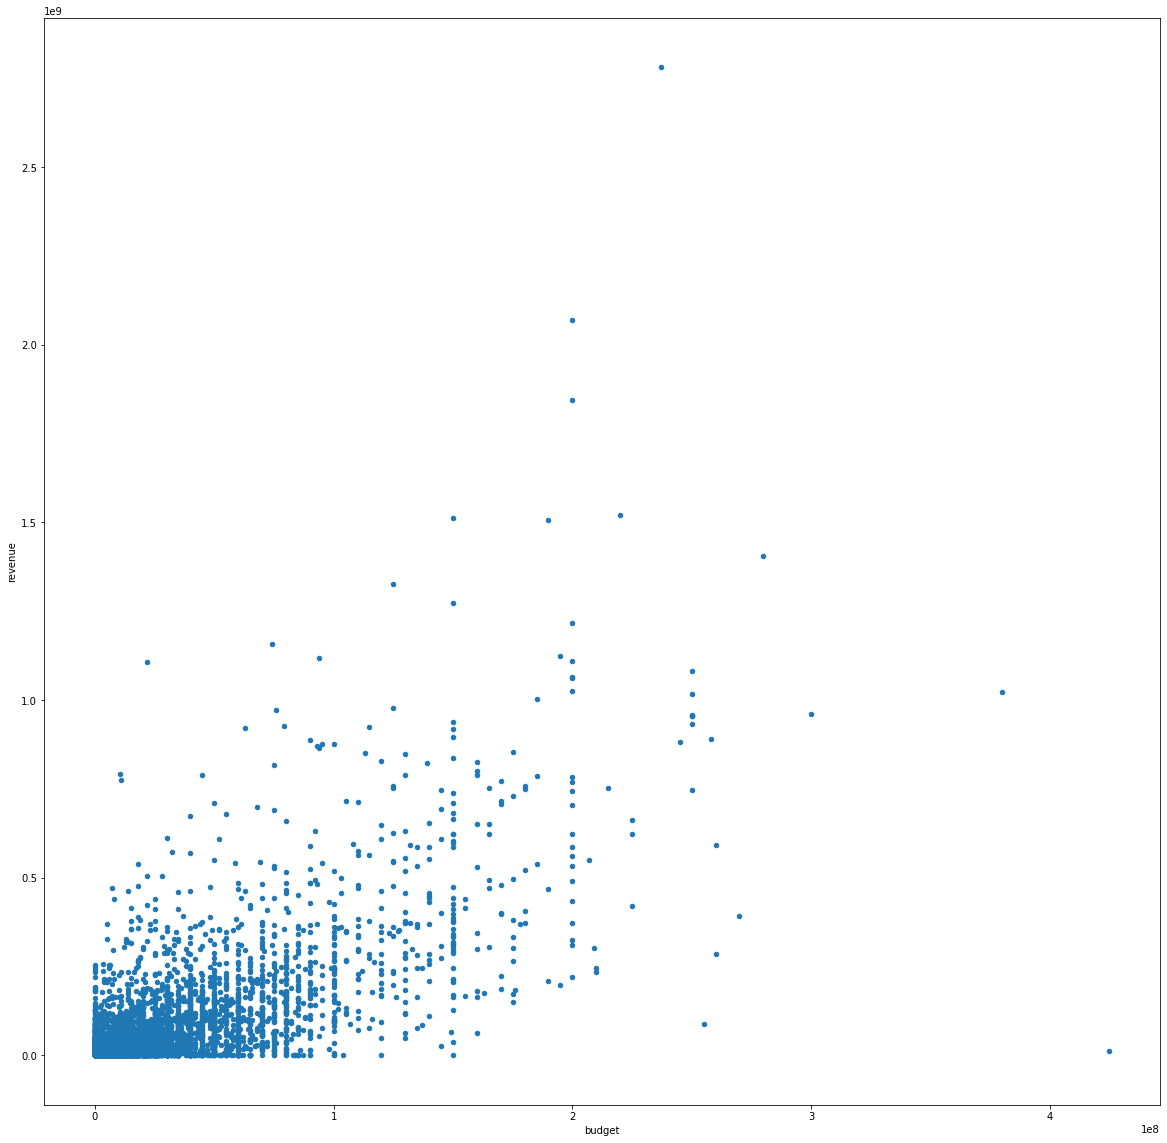

In [56]:
# relation between budget and revenue 
df.plot.scatter(x='budget',y='revenue',colormap='viridis',figsize=(20,20))

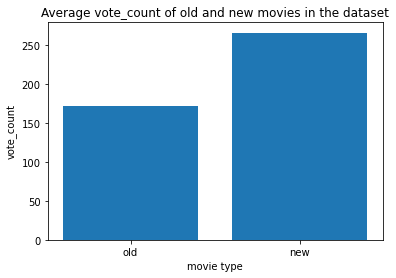

In [55]:
median = df['release_year'].median()
low = df.query('release_year < {}'.format(median))
high = df.query('release_year >= {}'.format(median))

mean_low = low['vote_count'].mean()
mean_high = high['vote_count'].mean()

locations = [1, 2]
heights = [mean_low, mean_high]
labels = ['old', 'new']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average vote_count of old and new movies in the dataset')
plt.xlabel('movie type')
plt.ylabel('vote_count');

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### who is the most director made movies ?

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['director'].value_counts()

Woody Allen                  45
Clint Eastwood               34
Steven Spielberg             29
Martin Scorsese              29
Ridley Scott                 23
                             ..
Larry Shaw                    1
Laura Poitras                 1
Damon Beesley|Iain Morris     1
Bill Pohlad                   1
Harold P. Warren              1
Name: director, Length: 5054, dtype: int64

### which year made the most revenue

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
x=df.groupby('release_year').mean()
x['revenue'].max()
y=x.query('revenue == 55786247.29842932')
y

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1997,15207.832461,0.714033,2.487480e+07,5.578625e+07,106.675393,214.52356,5.983246,3.379143e+07,7.578340e+07


<a id='conclusions'></a>
## Conclusions

> our data show that : <br>
1- avg of the votes are on new movies not old movies <br>
2- woody allen is the most director made movies <br>
3- most of the movies has some limit on budget except some movies <br>



> limitation of our data : <br>
1- there is not alot of data on old movies (most of the movies are new ones) <br>
2- there is no clue about the language of the movies which matters alot <br>